In [35]:
import requests
import json
from DbConn import *
from datetime import datetime, timedelta

def week_dataframe():
    db = DbConn()
    
    select_query = """
    select moviecd, max(movienm), avg(mrank), min(mrank),avg(salesshare),max(salesshare),avg(audicnt), max(audicnt),avg(scrncnt), max(scrncnt), avg(showcnt), max(showcnt),max(audiacc) 
    from boxoffice  
    where  opendt +13 >= dailydate2 and dailydate2 < TO_DATE('19/01/01', 'YY/mm/dd')
    group by moviecd
    order by moviecd
    """
    select_result = db.execute(select_query)

    print("첫주 작업 완료. -----")
    db.disconnect()
    return  select_result


def max_dataframe():
    db = DbConn()
    
    select_query = """
    select moviecd,  max(audiacc)
    from boxoffice 
    group by moviecd
    order by moviecd
    """
    select_result = db.execute(select_query)

    print("누적 작업 완료. -----")
    db.disconnect()
    return  select_result

def genre_dataframe():
    db = DbConn()
    
    select_query = """
    select max(moviecd),  max(genrenm)
    from moviedetail
    group by moviecd
    order by moviecd
    """
    select_result = db.execute(select_query)

    print("누적 작업 완료. -----")
    db.disconnect()
    return  select_result

# print(week_dataframe())
# print(max_dataframe())
print(genre_dataframe())


누적 작업 완료. -----
[(19720061, '액션'), (19818004, '드라마'), (19880001, '애니메이션'), (19890291, '코미디'), (19900204, '드라마'), (19900335, '드라마'), (19910247, '액션'), (19950327, '범죄'), (19960126, '멜로/로맨스'), (19970099, '멜로/로맨스'), (19980074, '드라마'), (19990050, '드라마'), (19990140, '드라마'), (19990220, '멜로/로맨스'), (19990303, '액션'), (20000067, '멜로/로맨스'), (20010238, '미스터리'), (20010291, '가족'), (20020168, '애니메이션'), (20020186, '뮤지컬'), (20020222, '드라마'), (20030003, '드라마'), (20030404, '멜로/로맨스'), (20040525, '드라마'), (20040526, '코미디'), (20040695, '코미디'), (20040734, '멜로/로맨스'), (20040756, '애니메이션'), (20041524, '애니메이션'), (20050082, '멜로/로맨스'), (20060127, '드라마'), (20060204, '애니메이션'), (20060347, '드라마'), (20068576, '멜로/로맨스'), (20068659, '애니메이션'), (20070083, '드라마'), (20070454, '드라마'), (20070458, '멜로/로맨스'), (20070582, '드라마'), (20070602, '애니메이션'), (20071066, '멜로/로맨스'), (20078561, '애니메이션'), (20080071, '스릴러'), (20080349, '코미디'), (20081056, '범죄'), (20090683, '드라마'), (20090834, 'SF'), (20098169, '액션'), (20100211, '애니메이션'), (20110027, 

In [36]:
import pandas as pd

df_genre_column_name = ['mnumber', 'genrenm']
df_genre = pd.DataFrame(genre_dataframe(), columns=df_genre_column_name)
df_genre.tail()


누적 작업 완료. -----


,mnumber,genrenm
1549,20199949,드라마
1550,20199950,액션
1551,20199951,공포(호러)
1552,20199954,코미디
1553,20199981,애니메이션


In [37]:
# new_nation =[]
# for i in df_nation['mnation']:
#     if i in ['한국','미국','일본','중국','영국','프랑스']:
#         new_nation.append(i)
#     else :
#         new_nation.append('기타국가')

# df_nation['mnation'] = new_nation
# df_nation.head()

In [38]:
df_genre = pd.get_dummies(df_genre,columns=['genrenm'])
df_genre.head()

,mnumber,genrenm_SF,genrenm_가족,genrenm_공연,genrenm_공포(호러),genrenm_기타,genrenm_다큐멘터리,genrenm_드라마,genrenm_멜로/로맨스,genrenm_뮤지컬,genrenm_미스터리,genrenm_범죄,genrenm_사극,genrenm_스릴러,genrenm_애니메이션,genrenm_액션,genrenm_어드벤처,genrenm_전쟁,genrenm_코미디,genrenm_판타지
0,19720061,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,19818004,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,19880001,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,19890291,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,19900204,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
import pandas as pd

df_week_column_name = ['mnumber', 'mname','avg_rank', 'min_rank', 
                       'avg_dshare','max_dshare', 
                       'avg_dpeople','max_dpeople', 'avg_dscreen','max_dscreen',
                       'avg_dview','max_dview','sum_dpeople']
df_week = pd.DataFrame(week_dataframe(), columns=df_week_column_name)
df_week.tail()


첫주 작업 완료. -----


,mnumber,mname,avg_rank,min_rank,avg_dshare,max_dshare,avg_dpeople,max_dpeople,avg_dscreen,max_dscreen,avg_dview,max_dview,sum_dpeople
603,20189123,곰돌이 푸 다시 만나 행복해,5.266667,4,4.173333,6.3,27144.200000,78478,427.133333,536,1121.333333,1826,409678
604,20189262,더 넌,4.600000,2,9.686667,22.9,66165.066667,150142,598.200000,824,2107.066667,3287,992952
605,20189362,업그레이드,4.846154,3,4.546154,7.7,14177.846154,35782,186.538462,220,873.692308,1235,186532
606,20189783,챔피언,2.733333,2,12.293333,20.3,72001.666667,194847,686.866667,874,2846.866667,3921,1080720
607,20189843,호두까기 인형과 4개의 왕국,4.615385,4,5.715385,8.1,33308.153846,82644,252.153846,294,971.384615,1320,433779


In [40]:
df_max_column_name = ['mnumber', 'sum_total_people']
df_max = pd.DataFrame(max_dataframe(), columns=df_max_column_name )
df_max.tail()

누적 작업 완료. -----


,mnumber,sum_total_people
1548,20199949,8991
1549,20199950,5234641
1550,20199951,471266
1551,20199954,8491
1552,20199981,143853


In [41]:
df = pd.merge(df_week,df_max, on='mnumber')

df = pd.merge(df,df_genre, on='mnumber')


df.tail()

,mnumber,mname,avg_rank,min_rank,avg_dshare,max_dshare,avg_dpeople,max_dpeople,avg_dscreen,max_dscreen,...,genrenm_미스터리,genrenm_범죄,genrenm_사극,genrenm_스릴러,genrenm_애니메이션,genrenm_액션,genrenm_어드벤처,genrenm_전쟁,genrenm_코미디,genrenm_판타지
603,20189123,곰돌이 푸 다시 만나 행복해,5.266667,4,4.173333,6.3,27144.200000,78478,427.133333,536,...,0,0,0,0,0,0,1,0,0,0
604,20189262,더 넌,4.600000,2,9.686667,22.9,66165.066667,150142,598.200000,824,...,0,0,0,0,0,0,0,0,0,0
605,20189362,업그레이드,4.846154,3,4.546154,7.7,14177.846154,35782,186.538462,220,...,0,0,0,0,0,1,0,0,0,0
606,20189783,챔피언,2.733333,2,12.293333,20.3,72001.666667,194847,686.866667,874,...,0,0,0,0,0,0,0,0,0,0
607,20189843,호두까기 인형과 4개의 왕국,4.615385,4,5.715385,8.1,33308.153846,82644,252.153846,294,...,0,0,0,0,0,0,0,0,0,1


In [42]:
# df['sum_total_people'].describe()
print(df['sum_total_people'].quantile(q=0.9, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0.75, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0.5, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0.25, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0, interpolation='nearest')
     )

a = df['sum_total_people'].quantile(q=0.9, interpolation='nearest')
b = df['sum_total_people'].quantile(q=0.75, interpolation='nearest')
c = df['sum_total_people'].quantile(q=0.5, interpolation='nearest')
d = df['sum_total_people'].quantile(q=0.25, interpolation='nearest')
e = df['sum_total_people'].quantile(q=0, interpolation='nearest')
# 10%
# 25%
# 50%
# 75%
# 100%

4445387 2077544 706908 310008 131232


In [43]:
score_list = []
for i in df['sum_total_people']:
    if i >= a:
        score_list.append('A')
    elif i >= b:
        score_list.append('B')
    elif i >= c:
        score_list.append('C')
    elif i >= d:
        score_list.append('D')
    else :
        score_list.append('F')

        
df['score'] = score_list
df['score'].head()

0    D
1    F
2    F
3    A
4    F
Name: score, dtype: object

In [44]:
df.groupby('score')['score'].count()

score
A     62
B     91
C    151
D    152
F    152
Name: score, dtype: int64

In [45]:
X = df.drop(['mnumber', 'mname','sum_total_people','score'], axis=1)
X.tail()

,avg_rank,min_rank,avg_dshare,max_dshare,avg_dpeople,max_dpeople,avg_dscreen,max_dscreen,avg_dview,max_dview,...,genrenm_미스터리,genrenm_범죄,genrenm_사극,genrenm_스릴러,genrenm_애니메이션,genrenm_액션,genrenm_어드벤처,genrenm_전쟁,genrenm_코미디,genrenm_판타지
603,5.266667,4,4.173333,6.3,27144.200000,78478,427.133333,536,1121.333333,1826,...,0,0,0,0,0,0,1,0,0,0
604,4.600000,2,9.686667,22.9,66165.066667,150142,598.200000,824,2107.066667,3287,...,0,0,0,0,0,0,0,0,0,0
605,4.846154,3,4.546154,7.7,14177.846154,35782,186.538462,220,873.692308,1235,...,0,0,0,0,0,1,0,0,0,0
606,2.733333,2,12.293333,20.3,72001.666667,194847,686.866667,874,2846.866667,3921,...,0,0,0,0,0,0,0,0,0,0
607,4.615385,4,5.715385,8.1,33308.153846,82644,252.153846,294,971.384615,1320,...,0,0,0,0,0,0,0,0,0,1


In [46]:
Y=df['score']

In [47]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# train, test 7:3
X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                   test_size=0.3, random_state=999)

In [48]:
model = RandomForestClassifier(n_estimators=10, random_state=999)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=999, verbose=0, warm_start=False)

In [49]:
model.score(X_train,y_train)

0.9835294117647059

In [50]:
model.score(X_test,y_test)

0.8415300546448088

In [51]:
# cunfuse matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conMat = pd.DataFrame(confusion_matrix(y_test,y_pred),
                         index=['True[A]', 'True[B]', 'True[C]', 'True[D]',  'True[F]'],
                         columns=['Pred[A]', 'Pred[B]', 'Pred[C]', 'Pred[D]', 'Pred[F]'])

 # 정확도, precision, recall, f1
conMat

,Pred[A],Pred[B],Pred[C],Pred[D],Pred[F]
True[A],16,7,0,1,0
True[B],2,18,1,0,0
True[C],0,6,45,4,0
True[D],0,0,2,33,4
True[F],0,0,0,2,42


In [52]:
feat_labels = X.columns
feat_labels

Index(['avg_rank', 'min_rank', 'avg_dshare', 'max_dshare', 'avg_dpeople',
       'max_dpeople', 'avg_dscreen', 'max_dscreen', 'avg_dview', 'max_dview',
       'sum_dpeople', 'genrenm_SF', 'genrenm_가족', 'genrenm_공연',
       'genrenm_공포(호러)', 'genrenm_기타', 'genrenm_다큐멘터리', 'genrenm_드라마',
       'genrenm_멜로/로맨스', 'genrenm_뮤지컬', 'genrenm_미스터리', 'genrenm_범죄',
       'genrenm_사극', 'genrenm_스릴러', 'genrenm_애니메이션', 'genrenm_액션',
       'genrenm_어드벤처', 'genrenm_전쟁', 'genrenm_코미디', 'genrenm_판타지'],
      dtype='object')

 1) genrenm_공포(호러)                 0.001280
 2) genrenm_다큐멘터리                  0.000000
 3) genrenm_공연                     0.000000
 4) max_dview                      0.047382
 5) genrenm_드라마                    0.002051
 6) avg_rank                       0.032835
 7) avg_dview                      0.065655
 8) genrenm_멜로/로맨스                 0.006159
 9) genrenm_기타                     0.000000
10) sum_dpeople                    0.293601
11) avg_dscreen                    0.068332
12) avg_dshare                     0.055440
13) genrenm_가족                     0.000235
14) max_dscreen                    0.054841
15) min_rank                       0.022627
16) max_dpeople                    0.118586
17) max_dshare                     0.033453
18) genrenm_SF                     0.000854
19) avg_dpeople                    0.166802
20) genrenm_코미디                    0.004093
21) genrenm_판타지                    0.000455
22) genrenm_어드벤처                   0.005620
23) genrenm_미스터리                

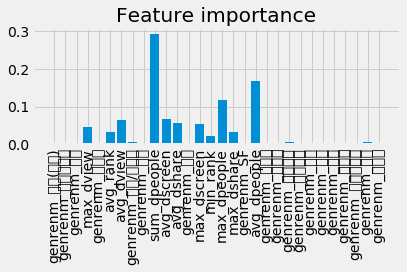

In [53]:
import numpy as np

plt.style.use('fivethirtyeight')

importances = model.feature_importances_
indices = np.argsort(importances[::-1])
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f"%(f+1,30,feat_labels[indices[f]],
                         importances[indices[f]]))
plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.tight_layout()
plt.show()